In [2]:
# Install YOLOv5
%cd /content/drive/MyDrive/rl3_assignment3
!git clone https://github.com/ultralytics/yolov5
%cd /content/drive/MyDrive/rl3_assignment3/yolov5
%pip install -qr requirements.txt

/content/drive/MyDrive/rl3_assignment3
Cloning into 'yolov5'...
remote: Enumerating objects: 15705, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 15705 (delta 8), reused 18 (delta 4), pack-reused 15672
Receiving objects: 100% (15705/15705), 14.51 MiB | 16.36 MiB/s, done.
Resolving deltas: 100% (10749/10749), done.
/content/drive/MyDrive/rl3_assignment3/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.4/589.4 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 26.2 MB/s eta 0:00:00


In [3]:
import torch
from IPython.display import Image, clear_output

clear_output()
print("Setup complete. Using torch %s %s" % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else "CPU"))

Setup complete. Using torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [4]:
# Train
!python train.py --img 640 --data "/content/drive/MyDrive/rl3_assignment3/yolov5_data/data.yaml" --cfg "/content/drive/MyDrive/rl3_assignment3/yolov5/models/yolov5s.yaml" --weights ''

train: weights=, cfg=/content/drive/MyDrive/rl3_assignment3/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/rl3_assignment3/yolov5_data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cl

In [5]:
# Copy best.pt to easier to access folder
!cp /content/drive/MyDrive/rl3_assignment3/yolov5/runs/train/exp/weights/best.pt /content/drive/MyDrive/rl3_assignment3

In [9]:
!python detect.py --weights /content/drive/MyDrive/rl3_assignment3/best.pt --conf 0.4 --source /content/drive/MyDrive/rl3_assignment3/yolov5_data/test/images

detect: weights=['/content/drive/MyDrive/rl3_assignment3/best.pt'], source=/content/drive/MyDrive/rl3_assignment3/yolov5_data/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/drive/MyDrive/rl3_assignment3/yolov5_data/test/images/dstudio-bcn-F3svh7bKb6I-unsplash_jpg.rf.c09b3f3dfe67dacc161a295df6221bb9.jpg: 640x640 2 spoons, 11.5ms
image 2/10 /content/drive/MyDrive/rl3_assignment3/yolov5_data/test/images/enrico-sottocorna-yko__BdO73I-unspl

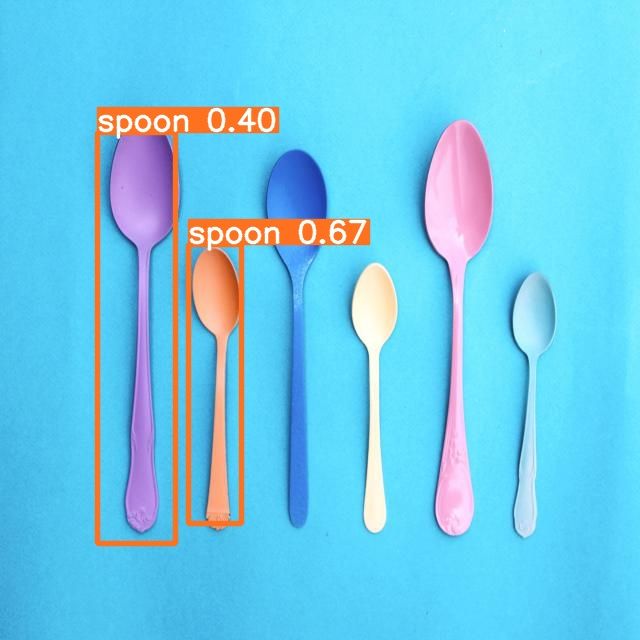

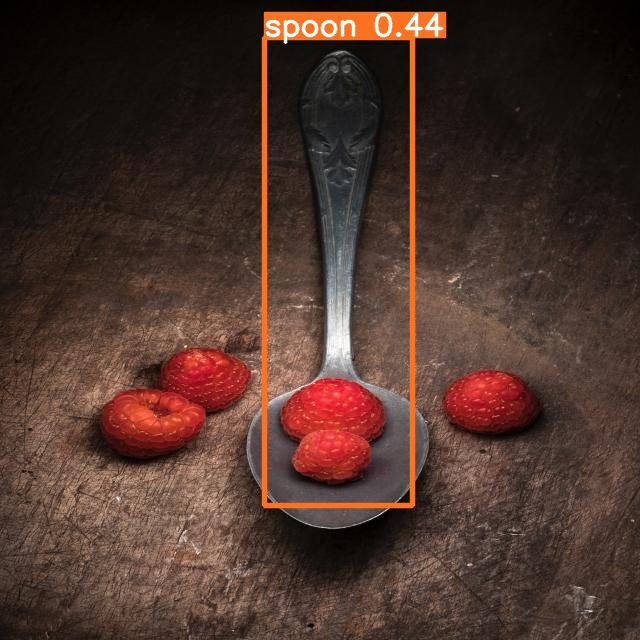

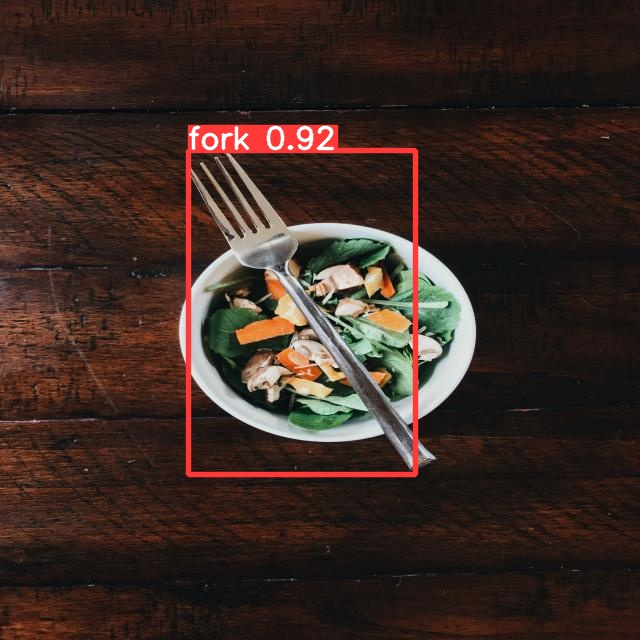

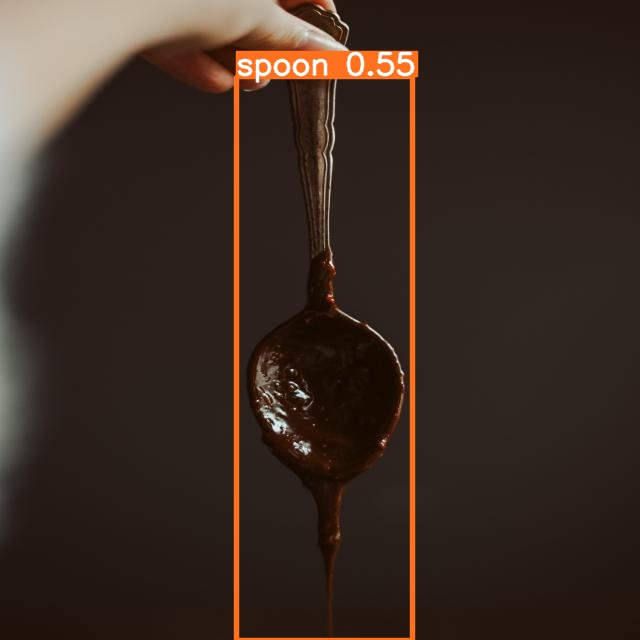

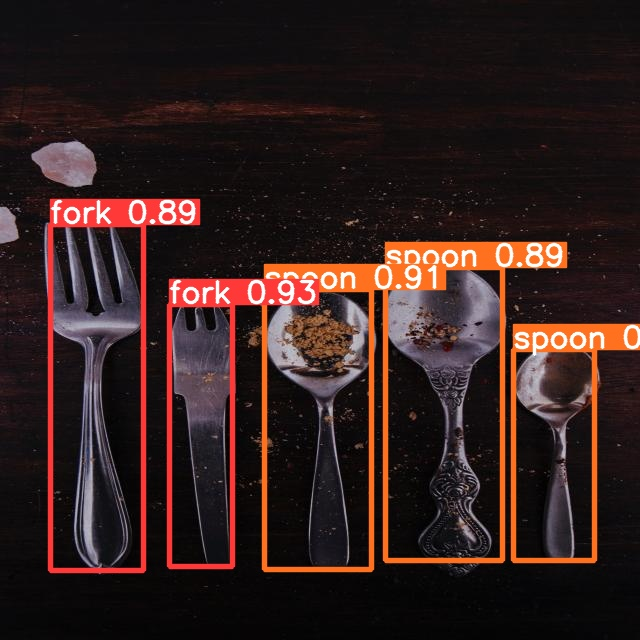

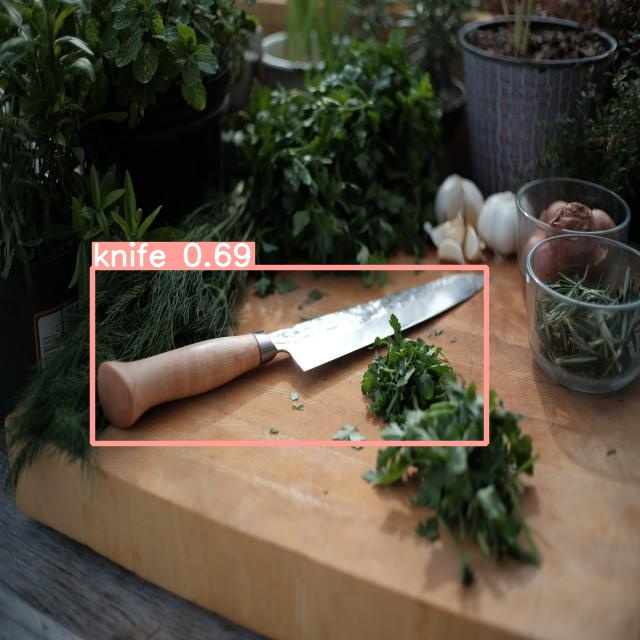

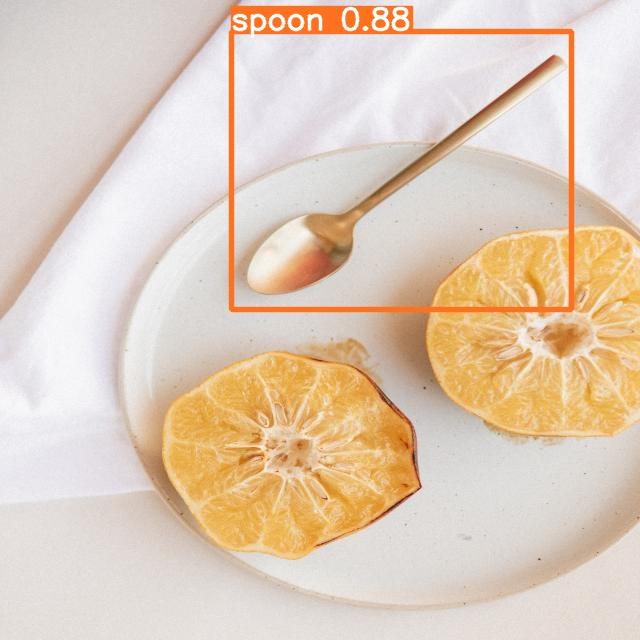

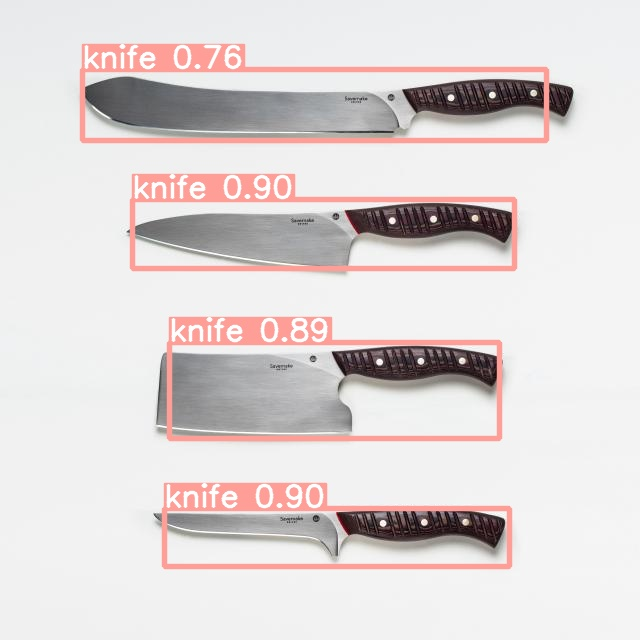

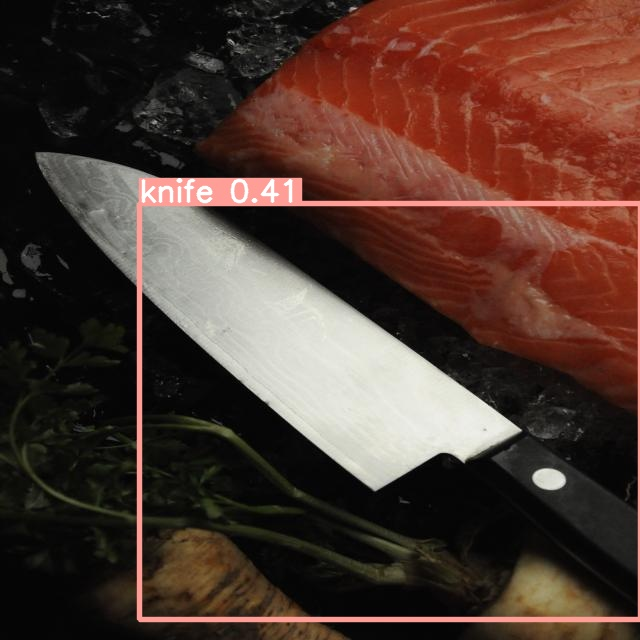

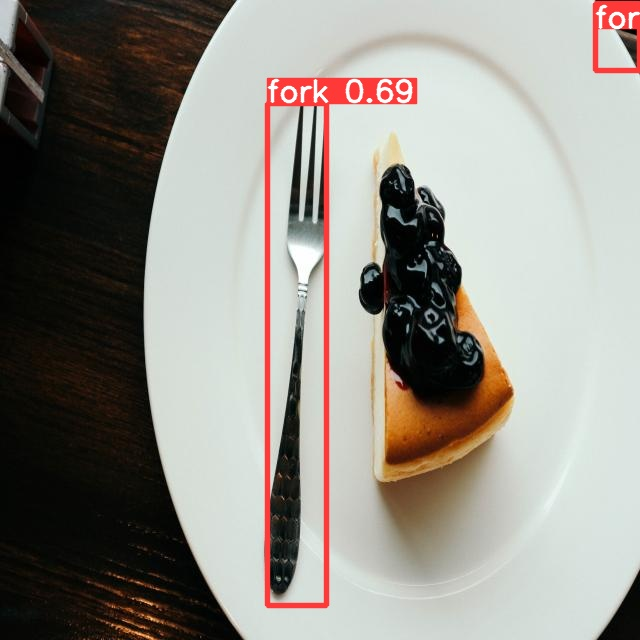

In [10]:
# Show picture
import glob
from IPython.display import Image, display

for imageName in glob.glob("/content/drive/MyDrive/rl3_assignment3/yolov5/runs/detect/exp3/*.jpg"):
  display(Image(filename=imageName))
  print("\n")